In [10]:
import torch
print("GPU disponible:", torch.cuda.is_available())


GPU disponible: True


In [11]:
# Librerías principales
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Confirmar si hay GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando:", device)


Usando: cuda


In [12]:
# Transformaciones: pasar imágenes a tensor y normalizar
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Descargar dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False)

# Nombres de las clases
classes = ('avión', 'auto', 'pájaro', 'gato', 'ciervo',
           'perro', 'rana', 'caballo', 'barco', 'camión')


In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net().to(device)


In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)


In [15]:
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:
            print(f"[Época {epoch + 1}, Lote {i + 1}] pérdida: {running_loss / 200:.3f}")
            running_loss = 0.0

print('Entrenamiento terminado <3')


[Época 1, Lote 200] pérdida: 1.704
[Época 1, Lote 400] pérdida: 1.323
[Época 1, Lote 600] pérdida: 1.187
[Época 2, Lote 200] pérdida: 1.015
[Época 2, Lote 400] pérdida: 0.970
[Época 2, Lote 600] pérdida: 0.943
[Época 3, Lote 200] pérdida: 0.829
[Época 3, Lote 400] pérdida: 0.807
[Época 3, Lote 600] pérdida: 0.781
[Época 4, Lote 200] pérdida: 0.698
[Época 4, Lote 400] pérdida: 0.711
[Época 4, Lote 600] pérdida: 0.697
[Época 5, Lote 200] pérdida: 0.584
[Época 5, Lote 400] pérdida: 0.599
[Época 5, Lote 600] pérdida: 0.613
Entrenamiento terminado <3


In [16]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Precisión en test: {100 * correct / total:.2f}%")


Precisión en test: 71.44%


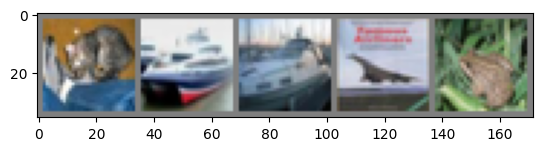

Etiquetas reales:  gato barco barco avión rana
Predicciones:  gato auto avión avión rana


In [17]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Tomar un batch de test
dataiter = iter(testloader)
images, labels = next(dataiter)

# Mostrar imágenes
imshow(torchvision.utils.make_grid(images[:5]))
print('Etiquetas reales: ', ' '.join(f'{classes[labels[j]]}' for j in range(5)))

# Predicciones
outputs = net(images[:5].to(device))
_, predicted = torch.max(outputs, 1)
print('Predicciones: ', ' '.join(f'{classes[predicted[j]]}' for j in range(5)))


In [18]:
torch.save(net.state_dict(), "modelo_cifar10.pth")
